## Import and subset Gender-Science IAT data

In [17]:
import numpy as np
import pandas 
import matplotlib as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import glob

In [26]:
genderiat = pandas.read_csv('gendersciiatdat.csv')

## Descriptives

In [27]:
# means of variables grouped by participant race, sorted by IAT scores
genderiat.groupby('raceomb').mean().sort_values(by = 'implicit')


,implicit,explicit,politics,year,age,education
raceomb,,,,,,
7.0,0.269313,4.784722,4.724638,2011.861111,24.028571,5.366197
3.0,0.269464,4.832075,4.910506,2012.098113,23.030189,6.027027
9.0,0.291069,4.804140,4.546926,2011.490446,25.366559,5.695793
2.0,0.293708,4.937690,4.672956,2011.553191,23.767584,6.287926
1.0,0.298682,4.916667,4.310345,2010.983333,26.559322,5.741379
5.0,0.303059,4.971850,4.699164,2011.359249,28.621918,5.808219
8.0,0.305332,4.680000,4.813609,2011.388571,24.962536,5.653295
6.0,0.357507,4.802758,4.707095,2011.616478,27.978797,6.293658
4.0,0.389733,4.911765,4.121212,2011.382353,24.606061,5.727273


# matplotlib

### Scatter IAT scores by age

Text(0.5,0,'Participant age')

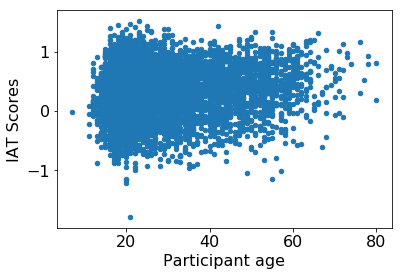

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# Scatter iat 
plt.rcParams.update({'font.size': 16}) # make default font size 16
genderiat.plot(kind='scatter', x='age', y='implicit') 
plt.ylabel('IAT Scores')
plt.xlabel('Participant age')

### Plot average IAT score by year

year
2007    0.401078
2008    0.359111
2009    0.362537
2010    0.367500
2011    0.343603
2012    0.360266
2013    0.325889
2014    0.314612
2015    0.306241
Name: implicit, dtype: float64


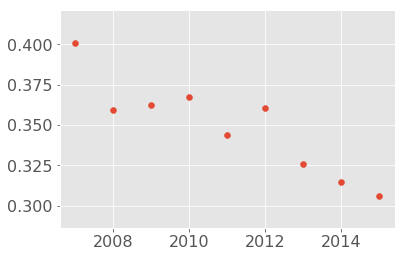

In [108]:
print(genderiat.groupby('year')['implicit'].mean()) # get average iat score each year
    # saved as Series of iat scores; does not save year as a column
# plot yearwise iat scores averages by year
plt.scatter([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], genderiat.groupby('year')['implicit'].mean())

### Histogram of IAT scores

(array([1.000e+00, 4.000e+00, 2.500e+01, 1.880e+02, 7.320e+02, 1.678e+03,
        2.434e+03, 1.932e+03, 6.510e+02, 5.600e+01]),
 array([-1.78898611, -1.45824019, -1.12749428, -0.79674836, -0.46600244,
        -0.13525652,  0.1954894 ,  0.52623531,  0.85698123,  1.18772715,
         1.51847307]),
 <a list of 10 Patch objects>)

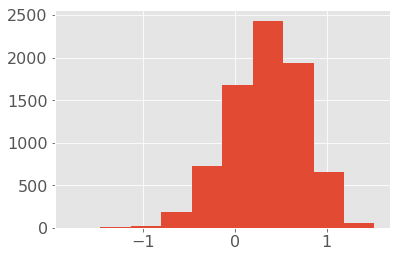

In [109]:
plt.hist(genderiat['implicit']) 

# seaborn

### Barplot IAT scores by participant gender

Text(0,0.5,'IAT score')

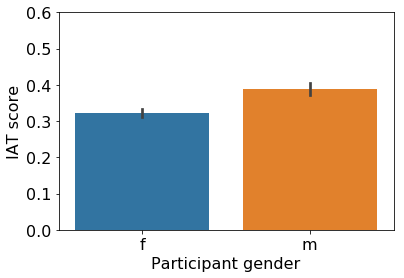

In [29]:
# looks like some gender responses are "."; consider to be missing and remove
genderiat['sex'].value_counts()
genderiat.drop(genderiat[genderiat.sex == "."].index, inplace=True)

# barplot of iat scores by gender using seaborn
import seaborn as sns
sns.barplot(x='sex', y='implicit', data=genderiat)
plt.ylim(0, .6)
plt.xlabel('Participant gender', fontsize=16)
plt.ylabel('IAT score', fontsize=16)


In [30]:
print(genderiat.groupby('sex')['implicit'].mean())


sex
f    0.322375
m    0.388038
Name: implicit, dtype: float64


In [62]:
genderiat['participant_number'] = range(1, len(genderiat) + 1)
genderiat.head()

,implicit,explicit,raceomb,sex,politics,year,age,education,new_col,participant_number
0,1.013018,4.5,6.0,f,3.0,2012,21.0,6.0,1,1
1,0.438193,5.0,6.0,f,4.0,2010,17.0,3.0,2,2
2,0.715223,5.0,NaN,m,NaN,2009,28.0,NaN,3,3
3,-0.015030,4.0,6.0,f,4.0,2013,25.0,7.0,4,4
4,0.560251,3.5,NaN,f,4.0,2014,19.0,7.0,5,5


# scipy

### T test comparing IAT scores of females to males

In [71]:
import scipy
females = genderiat[genderiat['sex'] == 'f'].groupby('participant_number').mean()
males = genderiat[genderiat['sex'] == 'm'].groupby('participant_number').mean()
t,p = scipy.stats.ttest_ind(females['implicit'], males['implicit'])
print(t, p)

-6.670723187484326 2.721590706855609e-11


### Correlation of explicit and implicit

In [87]:
r,p = scipy.stats.pearsonr(genderiat['explicit'], genderiat['implicit'])
print(round(r, 2), round(int(p)))


0.22 0


# statsmodels

### between-subject ANOVA

In [33]:
btw_aov_result = smf.ols('implicit ~ raceomb * sex', genderiat).fit()
btw_aov_table = sm.stats.anova_lm(btw_aov_result, typ=2)
print(btw_aov_table)



                  sum_sq      df          F        PR(>F)
sex             7.024142     1.0  43.890983  3.709442e-11
raceomb         0.405978     1.0   2.536793  1.112622e-01
raceomb:sex     0.490308     1.0   3.063732  8.009807e-02
Residual     1212.273587  7575.0        NaN           NaN


# pymc3

In [ ]:
# PyMC3 is a Python package for Bayesian statistical modeling and probabilistic machine 
# learning which focuses on advanced Markov chain Monte Carlo and variational fitting algorithms.

In [36]:
# create a copy of the data for these analyses
pmdf = genderiat.copy(deep=True)